## Model Evaluation Techniques

1) <b>Holdout method</b>: Splitting entire dataset into training set and test set without replacement

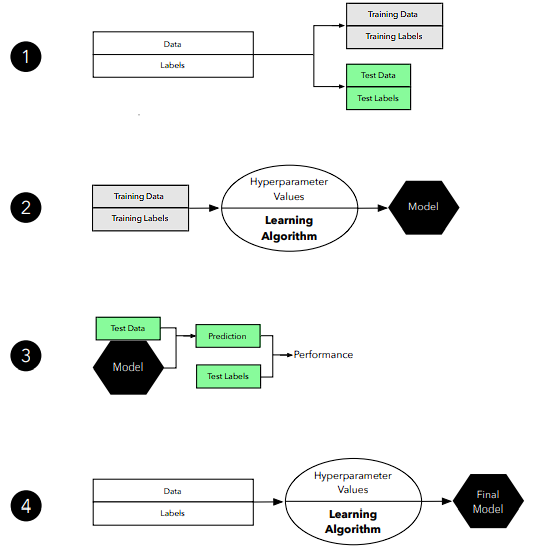

2) <b>Stratified holdout method</b>: Splitting entire dataset into training set and test set with similar target distribution without replacement.

Note that both holdout methods have the following disadvantages:
i) Violation of independent sampling

ii) Performance estimate would be pessimistically biased if model has not reached its capacity (i.e. witholding data from model for test set)

3) <b>Repeated holdout method</b>: Repeat on splitting entire dataset into training set and test set with different multiple random seeds without replacement

4) <b>Bootstrap</b>: Splitting entire dataset into training set and test set with replacement

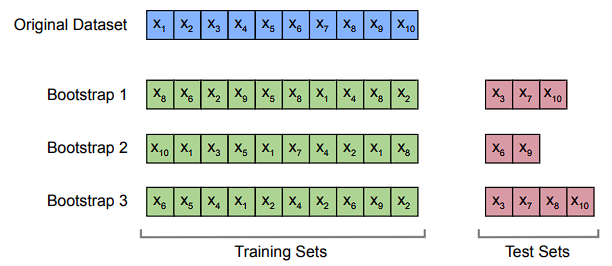

For machine learning models with hyperparameters, the following methods below are more suitable for model evaluation:

1) <b>Three-way holdout method</b>: Splitting entire dataset into training set, validation set and test set without replacement

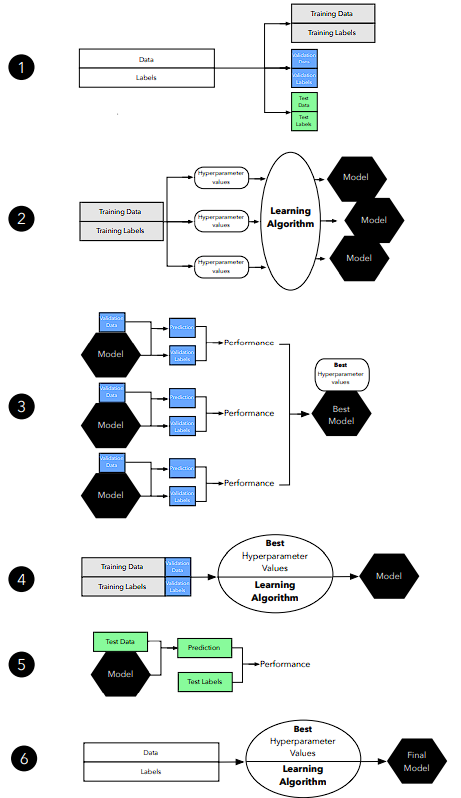

Note that three-way holdout method is more suitable for larger datasets.

2) <b>Leave-one-out cross validation</b>: Setting number of folds equals to number of observations, splitting entire dataset into training set with sample size of n -1 and test set with sample size of 1.

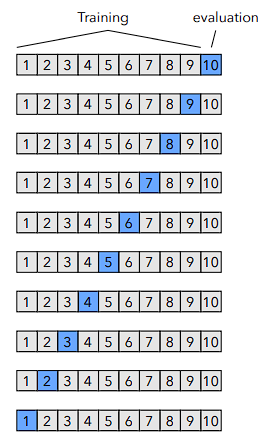

Disadvantage of LOOCV: Computationally expensive with higher variance and only most suitable for small datasets.

3) <b>K-fold cross validation</b>: Splitting entire dataset into training set and test set without replacement with k different non-overlapping folds.

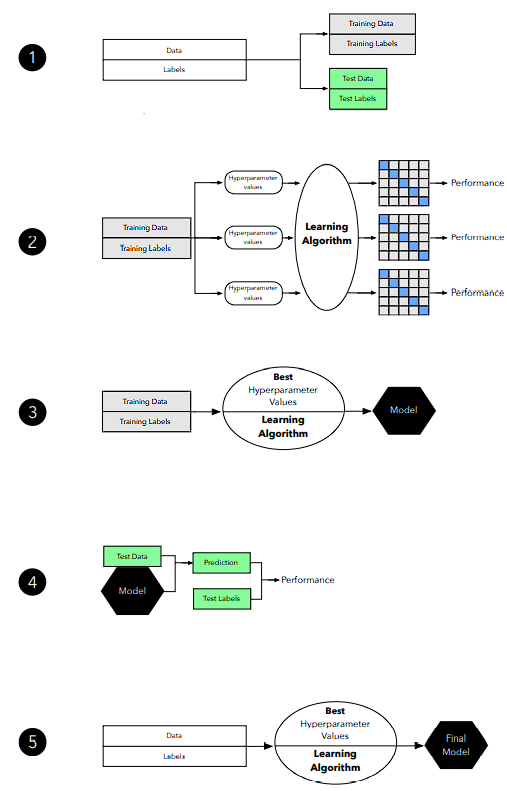

Note that increasing the number of folds in cross validation have the following effects:

• Bias of the performance estimator decreases (more accurate)

• Variance of the performance estimators increases (more variability)

• Computational cost increases (more iterations, larger training sets during fitting)

• Decreasing the value of k in k-fold cross-validation to small values also increases the variance on small datasets due to random sampling effects.

For comparing between different Machine Learning algorithms with hyperparameter tuning, the most suitable method to use is <b>nested cross validation</b>.

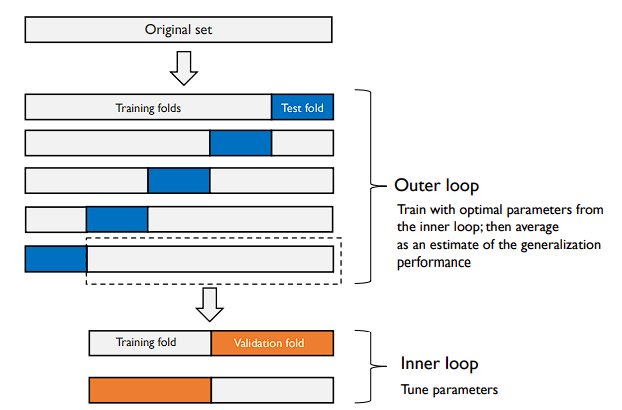

Nested cross validation further reduces bias, which provides better generalization error than simple k-fold cross validation. However, using multiple independent train and test sets is more preferable for larger datasets when comparing between different machine learning algorithms.

## Evaluation Metrics for Regression

For regression problems, the following metrics can be used to evaluate model performance between train, validation and test set:

1. Mean squared error (MSE)
2. Root mean squared error (RMSE)
3. Mean absolute error (MAE)
4. Mean absolute percentage error (MAPE)
5. R-squared
6. Adjusted R-squared

### Mean squared error (MSE)

Mean squared error (MSE) represents the squared difference between actual and predicted values.

<img src="https://pbs.twimg.com/media/Etuc3lBXcAEH7wO.png" width=300>

Advantages: Graph of MSE is differentiable, which can be used as a loss function

Disadvantages:
- Not consistent unit of measure with output, which is less interpretable
- Not robust to outliers

### Root mean squared error (RMSE)

Root mean squared error (RMSE) represents a simple square root of mean squared error (MSE).

Advantages: Consistent unit of measure with output variable, which is interpretable

Disadvantages: Not robust to outliers

### Mean absolute error (MAE)

Mean absolute error (MAE) represents the absolute difference between actual and predicted values.

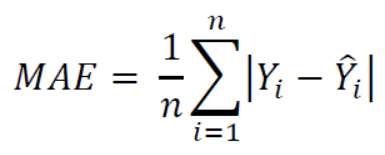

Advantages:
- Consistent unit of measure with output variable, which is interpretable
- Very robust to outliers

Disadvantages: Graph of MAE is not differentiable, which requires use of optimizers like gradient descent algorithm

### Mean absolute percentage error (MAPE)

Mean absolute percentage error (MAPE) represents the absolute difference between actual and predicted values in percentage terms

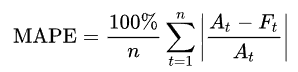

Advantages:
- Very intuitive interpretation in terms of relative error
- Very robust to outliers

Disadvantages: MAPE produces infinite or undefined values for zero or close-to-zero actual values

Note that MAPE is the most preferable metric to use to evaluate performance of regression models in most cases.

##  R-squared

R-squared statistic is a measure of goodness of fit of variables on regression model.

<b>Formula of R-squared</b>:

<img src ="https://miro.medium.com/max/1200/1*_HbrAW-tMRBli6ASD5Bttw.png" width="500">

The value of R-squared is usually between 0 and 1, which indicates the closer the value of R-squared to 1, the better the regression model fits the data and vice versa.

R-squared value is mostly suitable for model evaluation on linear regression models with only <b>one feature</b>.

One major disadvantage of R-squared is that including more features in regression model will lead to higher R-squared value, which misleads the performance of regression models. Including features that are insignificant in regression models may actually worsen its performance instead (overfitting)

##  Adjusted R-squared

An alternative to overcome the issue of using R-squared statistic for model evaluation is using Adjusted R-squared statistic.

Adjusted R-squared statistic penalizes excessive use of independent features that don't correlate with target variables, which can be used as part of feature selection with wrapper methods (i.e. forward/backward selection).

<b>Formula of Adjusted R-squared</b>:

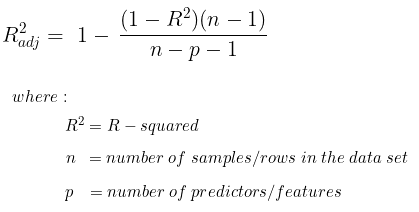

Similar to R-squared, the value of adjusted R-squared is usually between 0 and 1, which indicates the closer its value to 1, the better the regression model fits the data and vice versa.

For linear regression with multiple features, adjusted R-squared is the preferred choice for model evaluation over R-squared.

## Visualization Tools for Regression

### Residual Plot

Residuals in regression models represent difference between observed value and predicted value as error of prediction. Common use of residuals plot is to analyze variance of residuals of regressor. If points are randomly dispersed around horizontal axis, linear regression model is usually appropriate for the data, otherwise non-linear model is more appropriate.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from transformers import GaussianTransformer, OutlierCapTransformer, ScalingTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.regressor import CooksDistance
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
y.name = 'Median House Value ($100000)'

In [8]:
reg = LinearRegression()
pipeline = Pipeline(steps=[])
pipeline.steps.append(['outlier',OutlierCapTransformer(X.columns.tolist())])
pipeline.steps.append(['gaussian_transform',GaussianTransformer(X.columns.tolist())])
pipeline.steps.append(('scaling',ScalingTransformer('Standard')))
X_transformed = pipeline.fit_transform(X)
reg.fit(X_transformed,y)
y_pred = reg.predict(X_transformed)

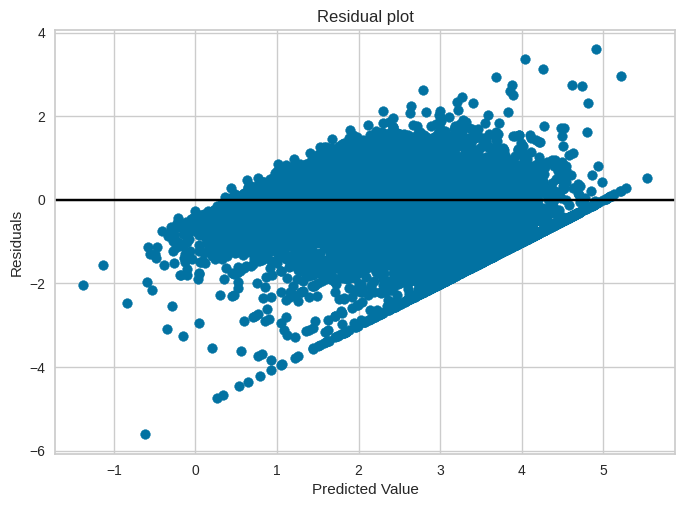

In [9]:
plt.scatter(x = y_pred, y= np.subtract(y_pred,y))
plt.axhline(y=0, color='black')
plt.title('Residual plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Value')
plt.show()

### Leverage Plot (Cook's distance)

Cook's distance represents observation's influence on a simple linear regression. Observations with large influences may be outliers and datasets with large number of highly influential points might not be suitable for linear regression without further preprocessing such as outlier removal or imputation.

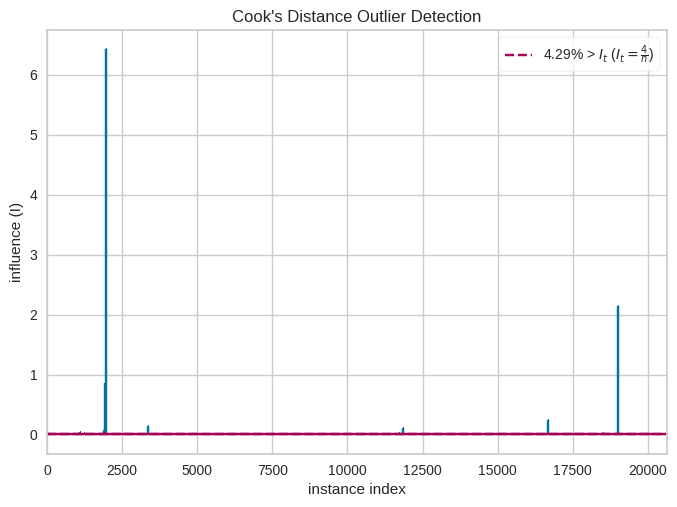

In [10]:
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()
plt.show()